In [1]:
from ramCOH.signal_processing import functions as f
import ramCOH.raman as ram
from ramCOH.signal_processing import curves as c
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
olivine_file = "./olivine/PI065-04-01_2022_03_01_14_48_11_532nm_Edge_100�_x50_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(olivine_file, unpack=True)

In [3]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect()
olivine.calculate_noise()
olivine.noise

9.874685097503354

In [4]:
olivine.processing

{'baseline_corrected': True, 'normalised': False, 'smoothed': False}

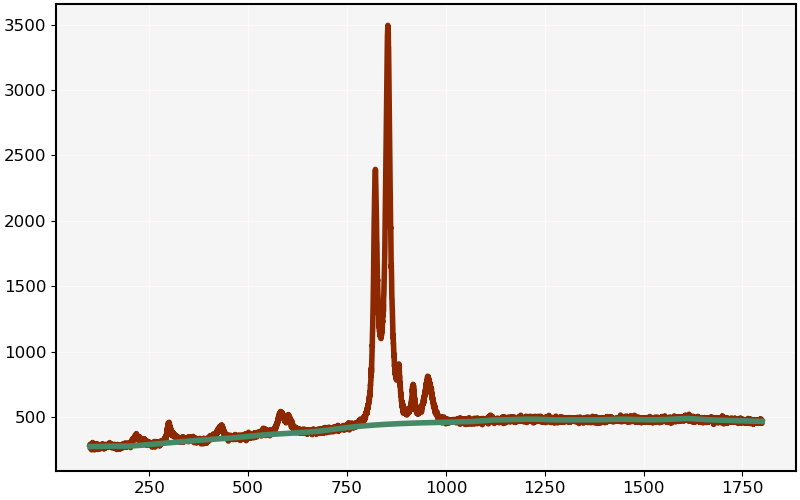

In [5]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.plot(x, olivine.baseline)

# plt.plot(olivine.x, olivine.signal.baseline_corrected)

plt.show()

In [ ]:
olivine.deconvolve(peak_prominence=3, noise_threshold=1.4)

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.signal.baseline_corrected, linewidth=2)
plt.plot(olivine.x, c.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.deconvoluted_peaks:
    plt.plot(olivine.x, c.GaussLorentz(olivine.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)

In [ ]:
olivine.deconvolution_parameters